<a href="https://www.kaggle.com/code/mdsjaomdsjao/first-notebook-taxa-homic-dios-pe-2012-2022?scriptVersionId=228596536" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

## Mortes por Homicídio - Pernambuco (2012-2022)

> Taxa de homicídios em Pernambuco de 2012 a 2022.
> Fonte: IPEA. 
> Retirado de: https://www.ipea.gov.br/atlasviolencia/dados-series/20
---

Este é meu primeiro notebook publicado . 
Foi usada apenas a biblioteca pandas para manipular os dados e gerar alguns gráficos de forma rápida.

### METADADOS

Fonte:

População utilizada no ano 1996: IBGE - Contagem Populacional; nos anos 1997-2003 e 2016:População Residente - Estimativas para o TCU - Brasil; 2004-2015: IBGE/Diretoria de Pesquisas. Coordenação de População e Indicadores Sociais. Gerência de Estudos e Análises da Dinâmica Demográfica. Somente na abrangência referente às Unidades Federativas.

IBGE - Contagem Populacional e População Residente - Estimativas para o TCU - Brasil. Para as outras abrangências referentes à Região e País.

MS/SVS/CGIAE - Sistema de Informações sobre Mortalidade - SIM

Para o período de 1979 a 1995 considera os códigos CIDs 9: E960-E978 (Homicídios e lesões provocadas intencionalmente outras pessoas) e E990-E999 (Intervenções legais).

Considera os códigos CIDs 10: X85-Y09 (agressão) e Y35 (intervenção legal)

Óbitos por residência.

Taxa multiplicada por 100.000.

Elaboração Diest/Ipea.

In [1]:
import pandas as pd # importando a biblioteca pandas

In [2]:
df = pd.read_csv('/kaggle/input/first-notebook-taxa-homicdios-pe-2012-2022/taxa-homicidios-2012-01-15-2022-01-15.csv',sep=';') # criando o data frame baseado no arquivo csv.

In [3]:
df.head() # Verificação rápida no dataframe

,cod,nome,período,valor
0,26,PE,2012,37.25
1,26,PE,2013,33.92
2,26,PE,2014,36.19
3,26,PE,2015,41.16
4,26,PE,2016,47.26


In [4]:
df.info() # Verificação rápida no dataframe

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11 entries, 0 to 10
Data columns (total 4 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   cod      11 non-null     int64  
 1   nome     11 non-null     object 
 2   período  11 non-null     int64  
 3   valor    11 non-null     float64
dtypes: float64(1), int64(2), object(1)
memory usage: 480.0+ bytes


In [5]:
df.drop(columns='cod', inplace=True) # excluindo a coluna "cod" ou "código do estado" pois temos apenas dados de Pernambuco.
df.drop(columns='nome', inplace=True) # excluindo a coluna "nome" ou "nome do estado" pois temos apenas dados de Pernambuco.
df.rename(columns={'período': 'Ano', 'valor': 'Homicídios/100 mil hab.'}, inplace=True) # Deixando o nome das colunas mais claro, assim facilitando a leitura. inplace=True para alterar o dataframe original.

In [6]:
df.head() # Verificando se ocorreu tudo ok com as alterações feitas.

,Ano,Homicídios/100 mil hab.
0,2012,37.25
1,2013,33.92
2,2014,36.19
3,2015,41.16
4,2016,47.26


In [7]:
media_taxa = round(df['Homicídios/100 mil hab.'].mean(),ndigits=2)
print("Média da taxa de homicídios por 100 mil habitantes em Pernambuco de 2012 a 2022: ", media_taxa, "a cada 100 mil hab.")


Média da taxa de homicídios por 100 mil habitantes em Pernambuco de 2012 a 2022:  40.33 a cada 100 mil hab.


In [8]:
ano_maior_taxa = df.loc[df['Homicídios/100 mil hab.'].idxmax()]
print(f"O ano com o maior número de homicídios por 100 mil habitantes em PE deste período foi {ano_maior_taxa['Ano']:.0f} com {ano_maior_taxa['Homicídios/100 mil hab.']:.1f} a cada 100 mil habitantes.")

O ano com o maior número de homicídios por 100 mil habitantes em PE deste período foi 2017 com 57.2 a cada 100 mil habitantes.


In [9]:
ano_menor_taxa = df.loc[df['Homicídios/100 mil hab.'].idxmin()]
print(f"O ano com o menor número de homicídios por 100 mil habitantes em PE deste período foi {ano_menor_taxa['Ano']:.0f} com {ano_menor_taxa['Homicídios/100 mil hab.']:.1f} a cada 100 mil habitantes.")

O ano com o menor número de homicídios por 100 mil habitantes em PE deste período foi 2013 com 33.9 a cada 100 mil habitantes.


In [10]:
# Variação entre os anos
df_variacao = df.copy()
df_variacao.drop(0,inplace=True)
df_variacao['Variação (em %)'] = round(df['Homicídios/100 mil hab.'].pct_change()*100,ndigits=2)
df_variacao[['Ano', 'Homicídios/100 mil hab.', 'Variação (em %)']]

# Por não possuir o ano de 2011 no CSV foi ignorado a variação da taxa no ano de 2012.


,Ano,Homicídios/100 mil hab.,Variação (em %)
1,2013,33.92,-8.94
2,2014,36.19,6.69
3,2015,41.16,13.73
4,2016,47.26,14.82
5,2017,57.20,21.03
6,2018,44.12,-22.87
7,2019,36.35,-17.61
8,2020,39.36,8.28
9,2021,35.54,-9.71
10,2022,35.24,-0.84


In [11]:
print(f"Maior aumento da taxa nesse período: {df_variacao['Variação (em %)'].max()}%") # Maior aumento da taxa nesse período

Maior aumento da taxa nesse período: 21.03%


In [12]:
print(f"Maior queda da taxa nesse período: {(df_variacao['Variação (em %)'].min())}%") # Maior queda da taxa nesse período

Maior queda da taxa nesse período: -22.87%


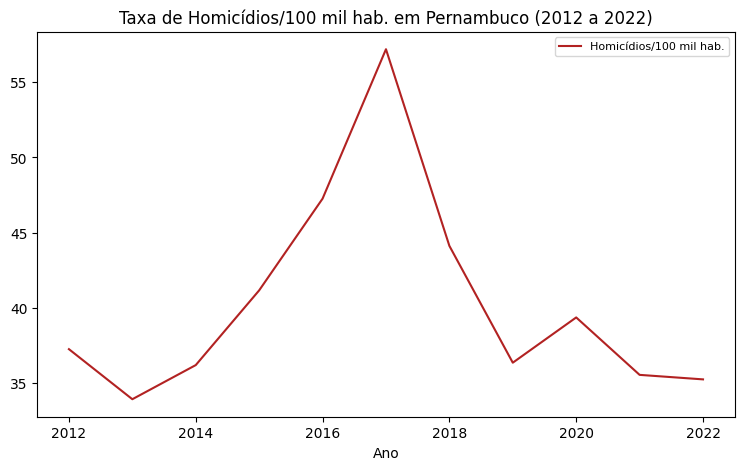

In [13]:
plot_line = df.plot(x='Ano', y='Homicídios/100 mil hab.', kind='line',figsize=(9,5),color = 'firebrick',title='Taxa de Homicídios/100 mil hab. em Pernambuco (2012 a 2022)',) # Criando gráfico de linha com os dados do data frame.
plot_line.legend(fontsize=8) # Modificando o tamanho da fonte da legenda.

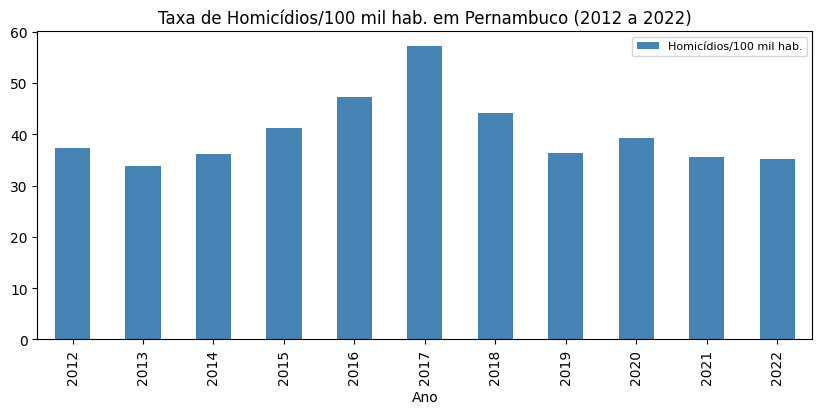

In [14]:
plot_bar_0 = df.plot(x='Ano', y='Homicídios/100 mil hab.', kind='bar',figsize=(10,4),color = 'steelblue',title='Taxa de Homicídios/100 mil hab. em Pernambuco (2012 a 2022)') # Criando gráfico de barra com os dados do data frame.
plot_bar_0.legend(fontsize=8)

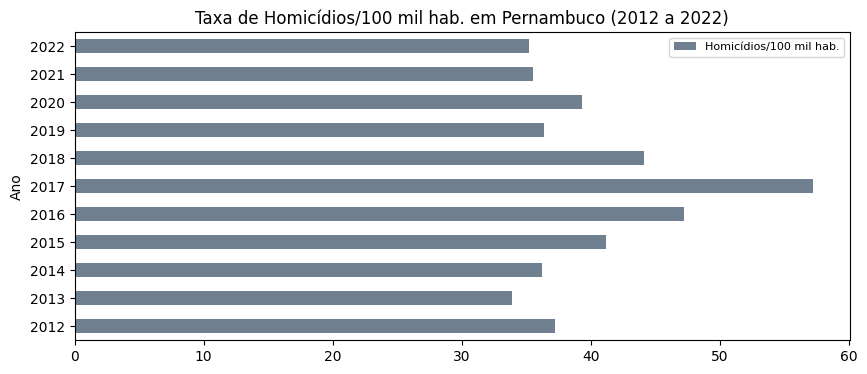

In [15]:
plot_bar_1 = df.plot(x='Ano', y='Homicídios/100 mil hab.', kind='barh',figsize=(10,4), color='slategray',fontsize=10,title='Taxa de Homicídios/100 mil hab. em Pernambuco (2012 a 2022)') # Criando gráfico de barra com os dados do data frame.
plot_bar_1.legend(fontsize=8)